# Linear_Regression 
#### 데이터 청년 캠퍼스_서울여자대학교 과정
python의 scikit-learn 패키지를 이용해 다중 회귀분석을 직접 실행해보려 한다.

- Scikit-learn에서는 데이터 분석 연습을 위한 몇 가지의 toy dataset을 제공하고 있다. 그 중 이번 시간에 사용할 데이터셋은 diabetes dataset이다.

- Diabetes dataset은 당뇨병 환자들의 1년간 당뇨병 진행 변화에 대한 데이터이다. 독립 변수는 나이와 성별 등 환자의 정보이며, 예측해야 하는 종속 변수는 당뇨병의 진행 정도이다. 

*결측치가 없고 데이터 정규화도 되어 있어 제공된 그대로 분석에 사용 한다.*

**sklearn의 회귀분석 순서**
1. 원하는 클래스 import
2. 객체 생성
3. fit() 적용 : 모형 생성, 즉 데이터를 가장 잘 설명하는 선형식 - 쉽게 말해서 <u>직선을 찾는다</u>. **fit()이 수행되면 기울기와 절편이 결정**된다.
4. 모형 기본정보 확인 : fit()에서 결정된 기울기, 절편 등을 확인한다.
5. score()로 성능 검사 : R2(R square)라고 해서 모형의 설명력을 나타내는 수치를 계산한다.
6. predict()로 예측 : 새로운 독립변수를 이용하여 종속변수를 예측한다.

In [1]:
# 패키지 삽입
from sklearn import datasets

# data 불러오기
data = datasets.load_diabetes()

# data 살펴보기
for k,v in data.items():
    print(k,':',v)

C:\Users\82104\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\82104\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\82104\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


data : [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
target : [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 

- x: 독립 변수
- y: 종속 변수 

In [2]:
# 독립변수, 종속변수 나누기 및 확인
x = data['data']
y = data['target']

print(x.shape,y.shape)
print('x:',x[:5],'\n y:', y[:5])

(442, 10) (442,)
x: [[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]] 
 y: [151.  75. 141. 206. 135.]


### 데이터 분할하기
적절한 모델을 학습시키기 위해서는 주어진 데이터를 training / validation / test 로 나누는 과정이 필수적

- 아래는 6:2:2로 나눴지만
이외에도 7:1.5:1.5로 나누기도 한다.

**validation set**
train으로 학습한 데이터 중에 최적의 방법을 찾는 것.<br>
그러니 validation set은 학습된 데이터 중 찾는 것이기 때문에 test로 해보는것도 중요함

In [3]:
#sklearn이 제공하는 train_test_split 사용
from sklearn.model_selection import train_test_split

In [4]:
#데이터 나누기 (6:2:2 비율로)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size =0.25, random_state =1)

print(x_train.shape, x_val.shape, x_test.shape)

(264, 10) (89, 10) (89, 10)


### 모델 학습하기
Training data를 이용해 회귀분석 모델을 학습하기. 

In [5]:
# 필요한 패키지 import
import numpy as np
from sklearn.linear_model import LinearRegression

Scikit-learn에서 제공하는 LinearRegression 모델을 선언할 때
<br>필요한 주요 parameter는 다음과 같다.

- **fit_intercept**: 상수항을 사용할 것인지에 대한 여부. True 일 때 상수항 사용. **default=True**
- **normalize**: 정규화를 수행할 것인지에 대한 여부. True 일 때 정규화 수행. **default=False**
<br>
<br>

회귀 분석 모델을 학습하기 위해선
1. 모델 객체 생성
2. 데이터를 이용한 학습

In [6]:
# 모델 객체 생성
mlr = LinearRegression() #fit_tintercept, normalize 기본값 사용

# 회귀분석 모델 학습
mlr.fit(x_train, y_train)

LinearRegression()

#### 추정한 모델의 회귀 계수 중 가장 영향력 있는 변수는?

- coefficient: indepenent variables의 계수
- intercept: 상수 (bias)

In [7]:
# 회귀 계수 확인
print(mlr.intercept_)
print(mlr.coef_)

147.87388534119617
[ -39.57865915 -236.60328634  489.97259328  352.8678163  -873.03276134
  430.03354622  208.4341436   306.03221956  746.84762599  116.37588728]


#### 추정한 모델의 설명력 확인
**- 결정계수 R-square**(설명력):<br>
독립변수가 종속변수를 얼마만큼 설명해 주는지를 가리키는 지표.<br>

R-square을 계산하려면 우선 training data에 대한 예측값을 알아야 한다.

In [8]:
#training data 예측값
pred_train = mlr.predict(x_train)

scikit-learn에서 제공하는 r2_score 함수를 이용해 R-square 값을 계산

In [9]:
#training data에 대한 R-square 값 계산
from sklearn.metrics import r2_score
print(r2_score(y_train,pred_train))

0.5353262888595558


Validation data, test data의 R-square값도 같은 방법으로 계산해 보기

In [10]:
# validation data에 대한 R-square
pred_val = mlr.predict(x_val)
print(r2_score(y_val,pred_val))

0.493408590131314


In [11]:
# test data에 대한 R-square
pred_test = mlr.predict(x_test)
print(r2_score(y_test, pred_test))

0.4432722010710275


## 모델 선택하기

### 1. 전진 선택법
상수항만 있는 모형에서 시작해, 설명력을 가장 크게 높일 수 있는 변수부터 하나씩 추가해 나가는 방법.<br>
- 더 이상 설명력의 이득이 없을 때까지 변수를 추가.

*원래는 F 검정을 기준으로 사용해야 하지만, 간단한 구현을 위해 R-square 로 대체한다.*

공집합에서 시작해, 매 반복마다 남아 있는 변수들 중 "추가했을 때 R-square 가 가장 큰 변수"를 기존의 변수집합에 더해 나가는 방식으로 구현.

In [12]:
# 선택된 변수들, R-square 값 및 모델 저장
best_variables = []
best_r2 = 0.
best_model = None

# 남아 있는 변수들
remain_variables = list(range(10))

for round in range(10):
    print(f"============ round {round+1} ============")
    r2_of_this_round = []
    models_of_this_round = []

    for var in remain_variables:
        # 사용될 변수들과 모델
        use_vars = best_variables + [var]
        model = LinearRegression()

        # 지정된 변수만 사용하게끔 데이터 추출
        x_train_small = x_train[:, use_vars]
        x_val_small = x_val[:, use_vars]

        # 지정된 변수로 모델 학습
        model.fit(x_train_small, y_train)
        models_of_this_round.append(model)

        # validation R-square(설명력) 계산
        r2 = r2_score(y_val, model.predict(x_val_small))
        r2_of_this_round.append(r2)
  
    # R-square 가 높은 모델 선택
    best_r2_of_this_round = np.max(r2_of_this_round)

    # 이전 round와 비교
    if best_r2_of_this_round > best_r2:
        best_var_of_this_round = np.argmax(r2_of_this_round)

        # 변수 추가, R-square 값 및 모델 업데이트
        best_variables.append(remain_variables[best_var_of_this_round])
        best_r2 = best_r2_of_this_round
        best_model = models_of_this_round[best_var_of_this_round]

        # 남은 변수들 중 선택된 변수 제거
        remain_variables.pop(best_var_of_this_round)

        print('best variables updated: ', best_variables)
        print('current best r2: ', best_r2)

  # 더 이상 개선되지 않으면 멈춤  
    else:
        print("no improvement")
        break



print('\n---------------------------------------------------\n')
print('final variables: ', sorted(best_variables))
print('final r2: ', best_r2)
  

============ round 1 ============
best variables updated:  [2]
current best r2:  0.4015039066196986
============ round 2 ============
best variables updated:  [2, 8]
current best r2:  0.48019951742375144
============ round 3 ============
best variables updated:  [2, 8, 6]
current best r2:  0.4911801371957262
============ round 4 ============
best variables updated:  [2, 8, 6, 1]
current best r2:  0.514245907690211
============ round 5 ============
best variables updated:  [2, 8, 6, 1, 3]
current best r2:  0.5333863843789604
============ round 6 ============
no improvement

---------------------------------------------------

final variables:  [1, 2, 3, 6, 8]
final r2:  0.5333863843789604


In [13]:
#test set 확인
print("test r2:",r2_score(y_test, best_model.predict(x_test[:, best_variables])))

test r2: 0.42090782097560653


결정계수 R-square 를 알고 있을 때, 수정 결정계수 adjusted R-square 를 다음과 같이 계산.

####  adjusted R-square을 하는 이유
먼저,
- R-square(=결정계수=설명력)
회귀 모델에서 독립변수(x)가 종속변수(y)를 얼만큼 설명해 주는지 가리키는 지표.<br>

**높을수록** 독립변수가 종속변수를 많이 설명한다는 것.
<br>
-> 실제, 종속변수를 잘 설명하지 못하는 변수가 추가되어도 증가하기 때문에 결정계수만 가지고 판단하는 것은 문제가 있다.

#### 따라서 Adjusted R-Squared를 사용한다..

In [14]:
# test data에 대한 adjust R-square 계산
pred_test = mlr.predict(x_test)
test_r2 = r2_score(y_test, pred_test)
test_adj_r2 = 1-(1-test_r2)*(y_test.shape[0]-1)/(y_test.shape[0]-x_test.shape[1]-1)
print(test_adj_r2)

0.3718968422339797


Adjusted R-square을 이용한 
## 2. 후진 제거법 

In [15]:
# 선택된 변수들, R-square 값 및 모델 저장
best_variables = list(range(10))
best_adj_r2 = 0.
best_model = None


# 선택된 변수들 중 Adjusted R-square의 손실이 가장 적은 변수를 골라 없애기
for round in range(10):
    print(f"============ round {round+1} ============")
    adj_r2_of_this_round = []
    models_of_this_round = []

    for var in best_variables:
        # 사용될 변수들과 모델
        use_vars = best_variables.copy()
        use_vars.remove(var)
        model = LinearRegression()

        # 지정된 변수만 사용하게끔 데이터 추출
        x_train_small = x_train[:, use_vars]
        x_val_small = x_val[:, use_vars]

        # 지정된 변수로 모델 학습
        model.fit(x_train_small, y_train)
        models_of_this_round.append(model)

        # validation adjusted R-square 계산
        r2 = r2_score(y_val, model.predict(x_val_small))
        adj_r2 = 1 - (1-r2)*(y_val.shape[0]-1)/(y_val.shape[0]-len(use_vars)-1)
        adj_r2_of_this_round.append(adj_r2)

  # R-square 가 높은 모델 선택
    best_adj_r2_of_this_round = np.max(adj_r2_of_this_round)

  # 이전 round와 비교
    if best_adj_r2_of_this_round > best_adj_r2:
        max_var = np.argmax(adj_r2_of_this_round)
        best_variables.pop(max_var)
        best_adj_r2 = best_adj_r2_of_this_round
        best_model = models_of_this_round[max_var]

        print('best variables updated: ', best_variables)
        print('current best r2: ', best_adj_r2)

  # 더 이상 개선되지 않으면 멈춤
    else:
        print("no improvement")
        break

print('---------------------------------------------------')
print('final variables: ', sorted(best_variables))
print('final adj_r2: ', best_adj_r2)

print('---------------------------------------------------')
test_r2=r2_score(y_test, best_model.predict(x_test[:, best_variables]))
test_adj_r2 =1-(1-test_r2)*(y_test.shape[0]-1)/(y_test.shape[0]-len(best_variables)-1) 
print('test adjust R-square: ', test_adj_r2)


============ round 1 ============
best variables updated:  [0, 1, 2, 3, 4, 5, 6, 8, 9]
current best r2:  0.44968750331058116
============ round 2 ============
best variables updated:  [0, 1, 2, 3, 4, 5, 6, 8]
current best r2:  0.468224109131373
============ round 3 ============
best variables updated:  [0, 1, 2, 3, 5, 6, 8]
current best r2:  0.47847527149248936
============ round 4 ============
best variables updated:  [0, 1, 2, 3, 6, 8]
current best r2:  0.49917040260293344
============ round 5 ============
best variables updated:  [1, 2, 3, 6, 8]
current best r2:  0.5052771304258852
============ round 6 ============
no improvement
---------------------------------------------------
final variables:  [1, 2, 3, 6, 8]
final adj_r2:  0.5052771304258852
---------------------------------------------------
test adjust R-square:  0.3860227499500407


## 회귀모형의 검정
Statsmodels 패키지에서는 OLS 라는 클래스를 이용하여 회귀분석을 진행한다. 아래와 같은 방식으로 학습을 진행하고 각종 테스트 결과를 확인.
<br>

*Scikit-learn에서와 다른 점 중 하나는 객체를 생성할 때 데이터를 미리 입력해주어야 한다는 것이고, 또 하나는 상수항을 따로 추가해 주어야 한다*

In [16]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api

In [17]:
sm_model = OLS(y_train, statsmodels.api.add_constant(x_train))

sm_model = sm_model.fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     29.15
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           7.63e-37
Time:                        15:41:33   Log-Likelihood:                -1417.7
No. Observations:                 264   AIC:                             2857.
Df Residuals:                     253   BIC:                             2897.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.8739      3.284     45.033      0.0

#### 다중공선성을 확인할 수 있는 VIF를 계산해 보자.

- 다중공선성이 높다: 예측 값의 신뢰구간이 넓게 형성되는 현상
- 다중공선성이 있다:
변수들 간 상관관계가 높다.
(회귀분석의 기존 전제가 무너진 것이기 때문에 다중공선성을 없애기 위해 노력해야 한다.)<br>

그러나 다중공선성은 상관관계가 높지만 상관관계가 높다고 다중공선성이 반드시 있는 것은 아니다.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
for i in range(x_train.shape[1]):
  print(f"VIF of x{i+1}: {variance_inflation_factor(x_train, i):.2f}")

VIF of x1: 1.26
VIF of x2: 1.28
VIF of x3: 1.48
VIF of x4: 1.47
VIF of x5: 52.46
VIF of x6: 33.02
VIF of x7: 14.75
VIF of x8: 9.38
VIF of x9: 9.72
VIF of x10: 1.50


다중공선성이 확인된 변수를 제외한 모델을 학습

In [20]:
# 다중공선성이 확인된 변수들을 제외하고 회귀분석 학습하고 결과 출력하기(statsmodels 이용)
use_variables = [i for i in range(x_train.shape[1]) if variance_inflation_factor(x_train, i) < 10]
small_model = OLS(y_train, statsmodels.api.add_constant(x_train[:, use_variables]))

small_model = small_model.fit()
print(small_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     37.13
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.18e-35
Time:                        15:46:41   Log-Likelihood:                -1426.4
No. Observations:                 264   AIC:                             2869.
Df Residuals:                     256   BIC:                             2897.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        148.3556      3.371     44.008      0.0

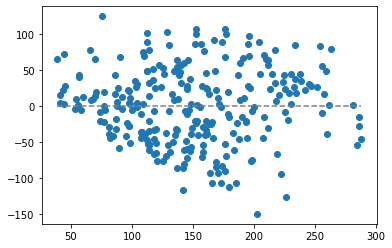

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(pred_train, y_train - pred_train)
plt.plot([pred_train.min(), pred_train.max()], [0, 0], '--', color='grey')